In [1]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

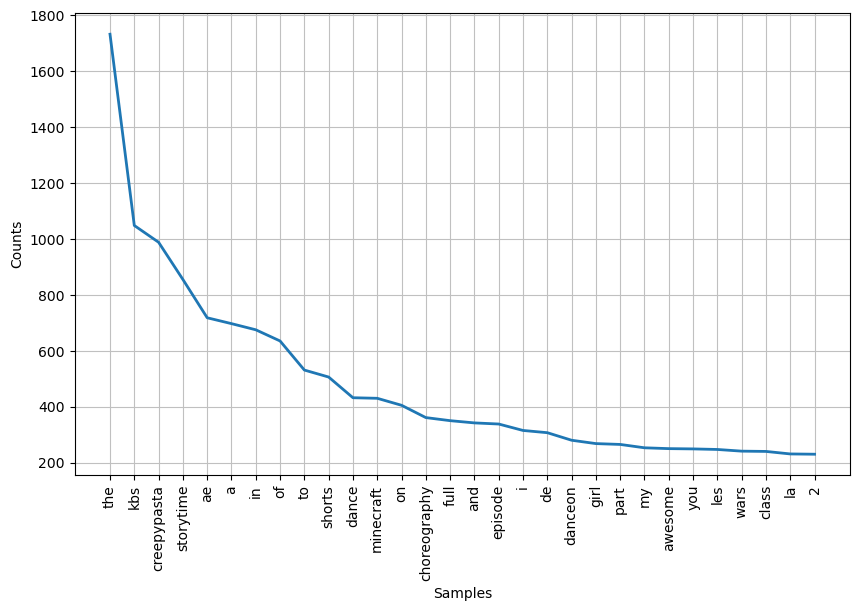

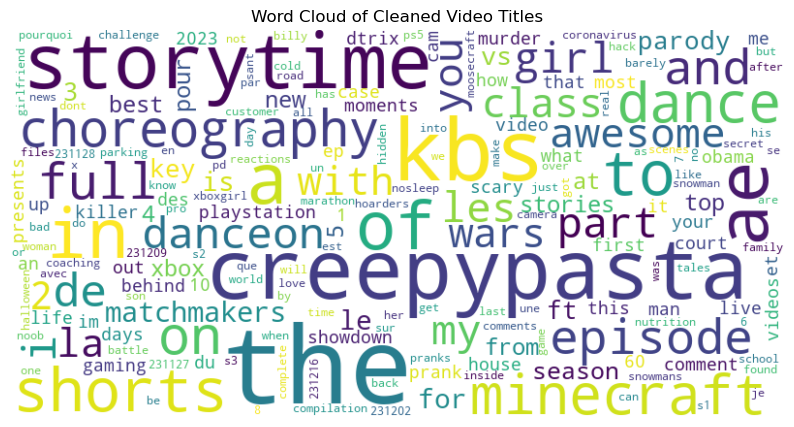

In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Remove special characters from video titles
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3])

# Tokenize the cleaned video titles
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: word_tokenize(x.lower()))

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles')
plt.show()

In [14]:
df.shape

(7859, 18)

In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Sample Tokenized Titles:
['epic', 'parkour', 'challenge', 'minecraft']
['noob', 'hacker', 'speed', 'tutorial']
['break', 'bedrock', 'minecraft']
['minecraft', 'pixel']
['minecraft', 'best', 'clutch', 'ever', 'gone', 'wrong']

Sample Cleaned Titles:
EPIC PARKOUR CHALLENGE in Minecraft
NOOB vs PRO vs HACKER Speed Run TUTORIAL
HOW TO BREAK BEDROCK in MINECRAFT
Minecraft Pixel Art
Minecraft best mlg clutch ever Gone Wrong


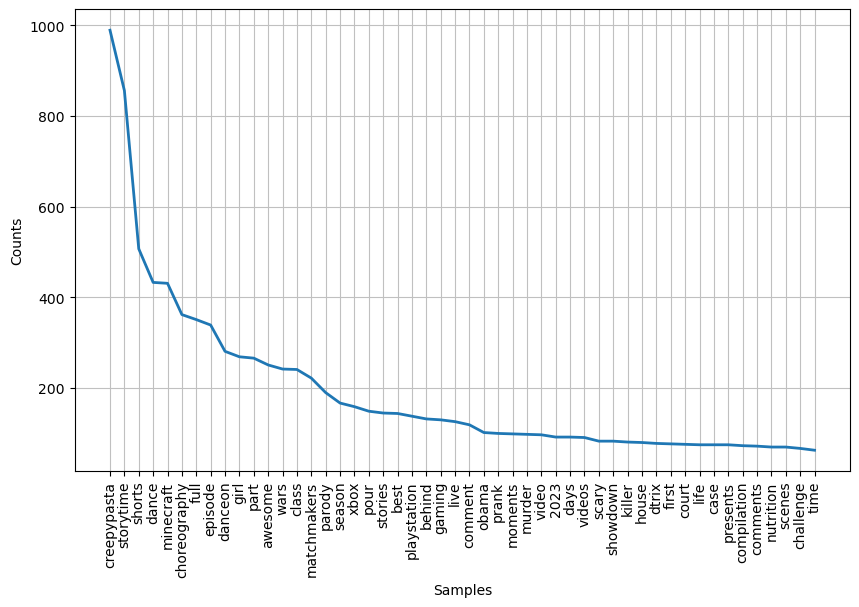

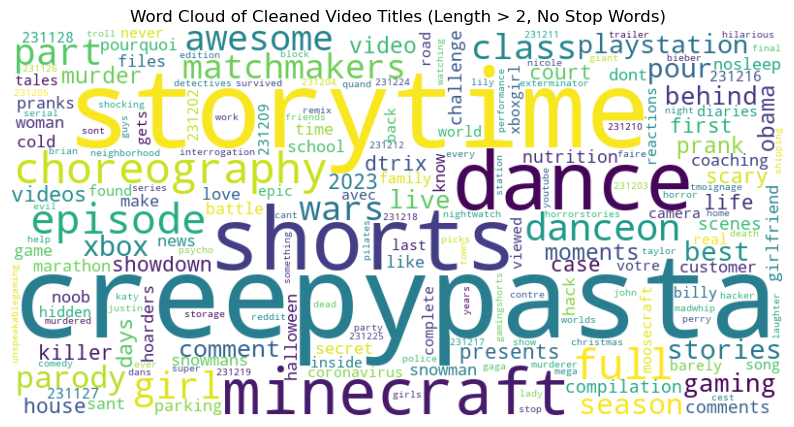

In [8]:
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 3 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)


# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
    
# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles (Length > 2, No Stop Words)')
plt.show()

In [32]:
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.033*"girl" + 0.021*"playstation" + 0.020*"creepypasta" + 0.018*"best" + 0.018*"storytime" + 0.014*"season" + 0.013*"part" + 0.013*"videos" + 0.012*"behind" + 0.012*"prank"')
(1, '0.035*"shorts" + 0.025*"matchmakers" + 0.018*"dance" + 0.014*"showdown" + 0.014*"dtrix" + 0.013*"presents" + 0.009*"wars" + 0.008*"days" + 0.008*"pranks" + 0.007*"episode"')
(2, '0.018*"full" + 0.016*"gaming" + 0.016*"episode" + 0.009*"video" + 0.009*"first" + 0.009*"dance" + 0.009*"xbox" + 0.008*"part" + 0.007*"murder" + 0.007*"shorts"')
(3, '0.047*"choreography" + 0.036*"danceon" + 0.035*"creepypasta" + 0.034*"dance" + 0.034*"storytime" + 0.030*"class" + 0.007*"obama" + 0.007*"school" + 0.006*"pour" + 0.005*"diaries"')
(4, '0.043*"creepypasta" + 0.032*"storytime" + 0.023*"minecraft" + 0.016*"stories" + 0.016*"parody" + 0.016*"awesome" + 0.008*"hack" + 0.007*"like" + 0.006*"nosleep" + 0.006*"shorts"')


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Sample Tokenized Titles:
['epic', 'parkour', 'challenge', 'minecraft']
['noob', 'pro', 'hacker', 'speed', 'run', 'tutorial']
['break', 'bedrock', 'minecraft']
['minecraft', 'pixel', 'art']
['minecraft', 'best', 'mlg', 'clutch', 'ever', 'gone', 'wrong']

Sample Cleaned Titles:
EPIC PARKOUR CHALLENGE in Minecraft
NOOB vs PRO vs HACKER Speed Run TUTORIAL
HOW TO BREAK BEDROCK in MINECRAFT
Minecraft Pixel Art
Minecraft best mlg clutch ever Gone Wrong
(0, '0.036*"dance" + 0.027*"girl" + 0.017*"playstation" + 0.016*"shorts" + 0.016*"season" + 0.014*"best" + 0.011*"videos" + 0.010*"video" + 0.010*"behind" + 0.010*"prank"')
(1, '0.026*"episode" + 0.025*"full" + 0.024*"part" + 0.018*"creepypasta" + 0.018*"storytime" + 0.014*"wars" + 0.008*"top" + 0.008*"first" + 0.008*"time" + 0.007*"shorts"')
(2, '0.039*"choreography" + 0.034*"danceon" + 0.028*"class" + 0.019*"xbox" + 0.014*"les" + 0.013*"parody

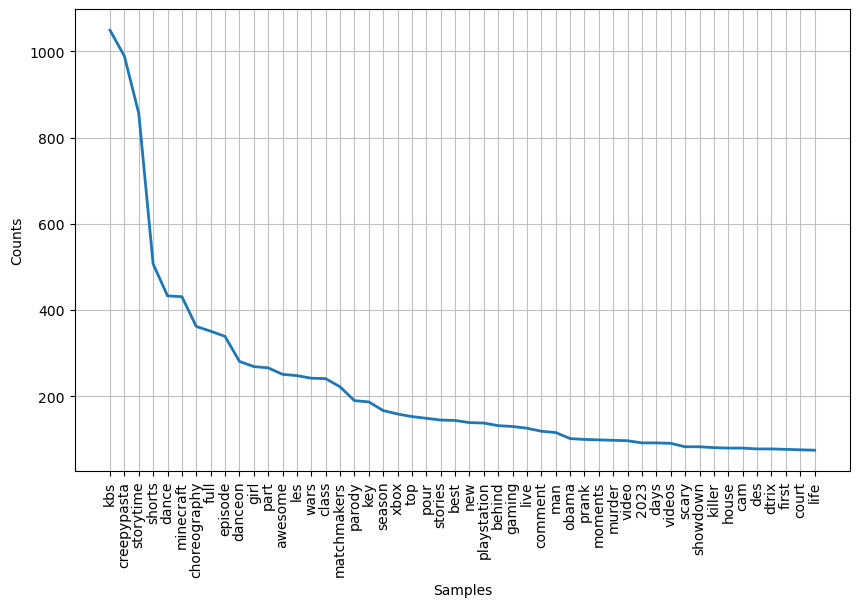

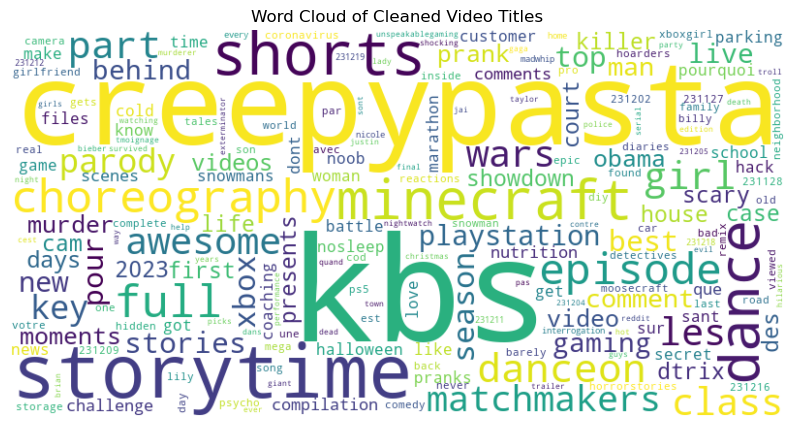

In [40]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy  # Add this import statement

# Download spaCy English language model
try:
    from spacy.cli import download
    download('en_core_web_sm')
except OSError:
    print("Model 'en_core_web_sm' already installed.")

# Assuming 'df' is your DataFrame with a column named 'title'
# Replace 'title' with the actual column name in your DataFrame.

# Load or create a DataFrame with your YouTube data
# Example: df = pd.read_csv('your_youtube_data.csv')

# Remove special characters from video titles, filter out short words, and remove stop words
stop_words = set(stopwords.words('english'))
df['cleaned_titles'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['tokenized_titles'] = df['cleaned_titles'].apply(lambda x: [word for word in word_tokenize(x.lower()) if len(word) > 2 and word not in stop_words])

# Calculate word frequency distribution
all_words = [word for tokens in df['tokenized_titles'] for word in tokens]
fdist = FreqDist(all_words)

# Print a sample of tokenized titles
print("Sample Tokenized Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['tokenized_titles'][i])

# Print a sample of cleaned titles
print("\nSample Cleaned Titles:")
for i in range(5):  # Print the first 5 titles as a sample
    print(df['cleaned_titles'][i])
    
from gensim import corpora, models

# Example: Topic Modeling with LDA
dictionary = corpora.Dictionary(df['tokenized_titles'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokenized_titles']]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

# Plot a bar chart of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(50, cumulative=False)
plt.show()

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Video Titles')
plt.show()


In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jasol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [12]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

df['pos_tags'] = df['tokenized_titles'].apply(lambda x: pos_tag(x))
print(df[['title', 'pos_tags']])

                                             title  \
0             EPIC PARKOUR CHALLENGE in Minecraft!   
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!   
2               HOW TO BREAK BEDROCK in MINECRAFT!   
3                              Minecraft Pixel Art   
4     Minecraft best mlg clutch ever! (Gone Wrong)   
...                                            ...   
7854                Underwater Camcorder Mod! $10!   
7855                   $10 Police Flashlight Hack!   
7856      Amazing Lasers! - Laser Flashlight Hack!   
7857                 Rocket Powered Matchbox Cars!   
7858          Infrared Goggle Hack For Under $10!!   

                                               pos_tags  
0     [(epic, RB), (parkour, JJ), (challenge, NN), (...  
1     [(noob, JJ), (hacker, NN), (speed, VBD), (tuto...  
2         [(break, NN), (bedrock, NN), (minecraft, NN)]  
3                        [(minecraft, NN), (pixel, NN)]  
4     [(minecraft, NN), (best, JJS), (clutch, NN), (...  
...

In [16]:
pip install textblob

     ------------------------------------ 636.8/636.8 kB 168.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Assuming you have a sentiment analysis library like TextBlob installed
from textblob import TextBlob

df['sentiment'] = df['tokenized_titles'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
print(df[['title', 'sentiment']])


                                             title  sentiment
0             EPIC PARKOUR CHALLENGE in Minecraft!       0.10
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!       0.00
2               HOW TO BREAK BEDROCK in MINECRAFT!       0.00
3                              Minecraft Pixel Art       0.00
4     Minecraft best mlg clutch ever! (Gone Wrong)       0.25
...                                            ...        ...
7854                Underwater Camcorder Mod! $10!       0.00
7855                   $10 Police Flashlight Hack!       0.00
7856      Amazing Lasers! - Laser Flashlight Hack!       0.60
7857                 Rocket Powered Matchbox Cars!       0.00
7858          Infrared Goggle Hack For Under $10!!       0.00

[7859 rows x 2 columns]


In [19]:

# Recommendation 1: Content Topics and Keywords
# Identify popular topics and keywords that resonate with the audience.
top_keywords = fdist.most_common(10)
print("Top Keywords:", top_keywords)

# Recommendation 2: Sentiment Analysis
# Understand the overall sentiment of the titles and focus on creating content with a positive sentiment.
average_sentiment = df['sentiment'].mean()
print("Average Sentiment:", average_sentiment)

# Recommendation 3: Named Entity Recognition (NER)

# Recommendation 4: Diversify Content Length
# Analyze the distribution of text lengths and consider diversifying content lengths to cater to different preferences.
text_lengths = df['tokenized_titles'].apply(len)
print("Mean Text Length:", text_lengths.mean())


Top Keywords: [('creepypasta', 989), ('storytime', 856), ('shorts', 507), ('dance', 433), ('minecraft', 431), ('choreography', 362), ('full', 351), ('episode', 339), ('danceon', 281), ('girl', 269)]
Average Sentiment: 0.030714533327699738
Mean Text Length: 5.020740552233108


In [34]:
from nltk import FreqDist
from nltk import bigrams

# Assuming df is your DataFrame with a 'tokenized_titles' column
all_bigrams = [bigram for tokens in df['tokenized_titles'] for bigram in bigrams(tokens)]
bigram_freq = FreqDist(all_bigrams)

# Print or visualize the results
print(bigram_freq.most_common(10))

[(('creepypasta', 'storytime'), 832), (('full', 'episode'), 276), (('choreography', 'danceon'), 206), (('danceon', 'class'), 203), (('playstation', 'girl'), 106), (('part', 'creepypasta'), 97), (('dance', 'videos'), 82), (('choreography', 'dance'), 81), (('dance', 'stories'), 81), (('parody', 'awesome'), 75)]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df is your DataFrame with a 'tokenized_titles' column
tokenized_titles = [' '.join(tokens) for tokens in df['tokenized_titles']]

# Convert tokenized titles to a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(tokenized_titles)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust the number of topics as needed
lda_topic_matrix = lda_model.fit_transform(dtm)

# Print or visualize the results
lda_topic_matrix

array([[0.04000045, 0.04000053, 0.04000052, 0.63999986, 0.23999864],
       [0.05000124, 0.29977401, 0.05000142, 0.55022166, 0.05000167],
       [0.06871448, 0.06691223, 0.06666812, 0.73074405, 0.06696113],
       ...,
       [0.03333384, 0.03333392, 0.36656569, 0.03333375, 0.5334328 ],
       [0.10000269, 0.10000316, 0.10000318, 0.59998735, 0.10000362],
       [0.10000029, 0.10000034, 0.59999872, 0.10000024, 0.1000004 ]])

In [26]:
# Assuming lda_topic_matrix is your LDA topic matrix
df['dominant_topic'] = lda_topic_matrix.argmax(axis=1) + 1  # Adding 1 to make topics start from 1

# Print or visualize the results
print(df[['title', 'dominant_topic']])


                                             title  dominant_topic
0             EPIC PARKOUR CHALLENGE in Minecraft!               4
1        NOOB vs PRO vs HACKER Speed Run TUTORIAL!               4
2               HOW TO BREAK BEDROCK in MINECRAFT!               4
3                              Minecraft Pixel Art               4
4     Minecraft best mlg clutch ever! (Gone Wrong)               4
...                                            ...             ...
7854                Underwater Camcorder Mod! $10!               1
7855                   $10 Police Flashlight Hack!               3
7856      Amazing Lasers! - Laser Flashlight Hack!               5
7857                 Rocket Powered Matchbox Cars!               4
7858          Infrared Goggle Hack For Under $10!!               3

[7859 rows x 2 columns]


In [27]:
# Assuming vectorizer is the CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print the top keywords for each topic
n_top_keywords = 10
for i, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords-1:-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    print(f'Topic {i+1}: {top_keywords}')


Topic 1: ['shorts', 'awesome', 'wars', 'matchmakers', 'parody', 'gaming', 'xbox', '2023', 'episode', 'comments']
Topic 2: ['dance', 'choreography', 'danceon', 'class', 'best', 'stories', 'videos', 'comment', 'school', 'love']
Topic 3: ['episode', 'girl', 'obama', 'murder', 'pour', 'days', 'killer', 'xbox', 'hack', 'sant']
Topic 4: ['creepypasta', 'storytime', 'minecraft', 'playstation', 'girl', 'showdown', 'house', 'dtrix', 'presents', 'challenge']
Topic 5: ['season', 'live', 'prank', 'episode', 'pranks', 'life', 'snowmans', 'snowman', 'girlfriend', 'hoarders']


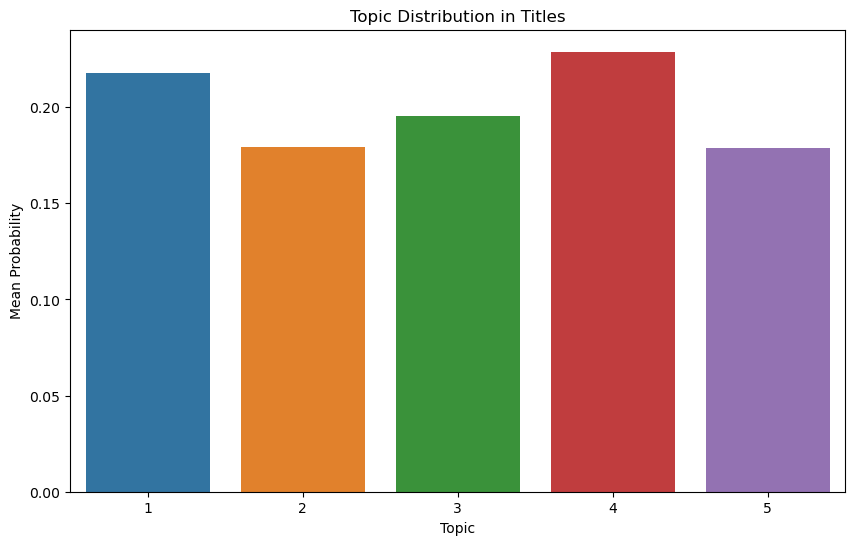

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lda_topic_matrix is your LDA topic matrix
topic_distribution = lda_topic_matrix.mean(axis=0)

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(topic_distribution)+1)), y=topic_distribution)
plt.title('Topic Distribution in Titles')
plt.xlabel('Topic')
plt.ylabel('Mean Probability')
plt.show()

In [31]:
# Assuming vectorizer is your CountVectorizer used for LDA
feature_names = vectorizer.get_feature_names_out()

# Print top keywords for each topic
n_top_keywords = 10
for topic_idx, topic in enumerate(lda_model.components_):
    top_keywords_idx = topic.argsort()[:-n_top_keywords - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_keywords)}")


Topic 1: shorts, awesome, wars, matchmakers, parody, gaming, xbox, 2023, episode, comments
Topic 2: dance, choreography, danceon, class, best, stories, videos, comment, school, love
Topic 3: episode, girl, obama, murder, pour, days, killer, xbox, hack, sant
Topic 4: creepypasta, storytime, minecraft, playstation, girl, showdown, house, dtrix, presents, challenge
Topic 5: season, live, prank, episode, pranks, life, snowmans, snowman, girlfriend, hoarders


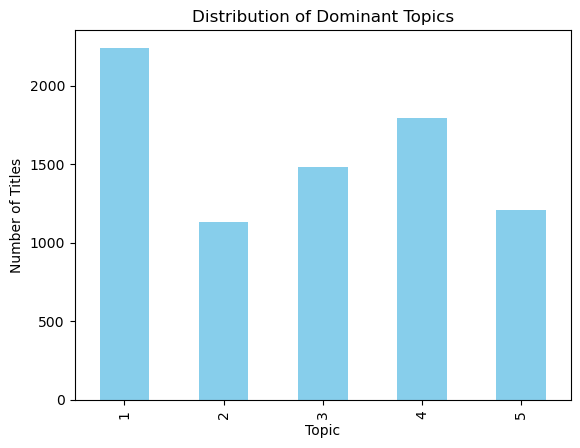

In [37]:
import matplotlib.pyplot as plt

topic_distribution = df['dominant_topic'].value_counts().sort_index()
topic_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Titles')
plt.show()

In [32]:
# Assuming df is your DataFrame
for topic_idx in range(1, lda_model.n_components + 1):
    topic_titles = df[df['dominant_topic'] == topic_idx]['title'].tolist()
    print(f"\nTitles for Dominant Topic {topic_idx}:\n")
    for title in topic_titles:
        print(title)



Titles for Dominant Topic 1:

Mushroom + Rabbit = ????
Minecraft Parrot in Glass! #shorts
villager + pig = ???
Did the EGG Or CHICKEN Come FIRST?
Wait for it...😅
Never summon herobrine
What if you breed sheep underwater?
Comment gérer sa consommation d'alcool ? 🥂 #shorts
Cet homme est décédé après avoir mangé des pâtes 😱
Pourquoi le baume à lèvres dessèche-t-il les lèvres ? 😬 #shorts
Comment traiter l'acné ? 🤔 (Ft. @Dr.MarieJourdan ) #shorts
10 RED FLAGS à repérer sur les sites de rencontres 🔍
8 idées reçues sur le Sida et le VIH !
Comment réaliser l'autopalpation des testicules ? 🤔 #shorts
Il a failli perdre son pénis en faisant ça 😱 #shorts
Exercices pour étirer son dos ! Ft. @pamz_therapy7669 💪
Comment enlever les points noirs ? 🤔 #shorts
Allergique aux facettes dentaires ? 😨 #shorts
PILATES PRÉNATAL : TONIFIER et RENFORCER le bas du corps !
Arracher un cheveux blanc en fait-il repousser d'autres ? 👩‍🦳 👨‍🦳 #shorts
Faut-il ABSOLUMENT retirer ses chaussures chez soi ? 🤔 #shorts
3 exe